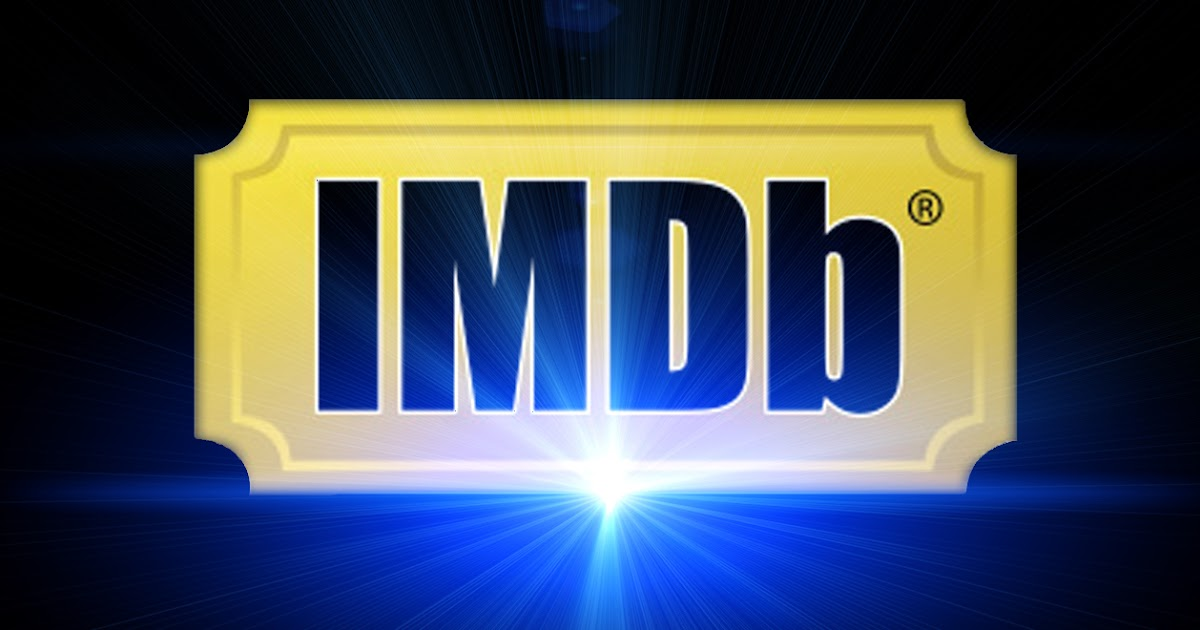

   # IMDB data from 2006 to 2016
   
 + Introduction 
 + Data readiness
 + Analysis and visualization
 + Conclusion
 

## Introduction 



+ What is IMDb?
IMDb is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.
+ The reason to choose it
As you all may know that nowadays watching films is a relaxing part of everyday life for most ordinary people.
Everyone has their own interests and tastes when it comes to choosing a movie.
Therefore, I decided to choose this particular area for the practical part as analysis.


## Data Description

#### This dataset has columns:
+ Rank - the position on the table of films (not rating)
+ Title - Name of the film
+ Genre - a category of artistic, musical, or literary composition characterized by a particular style of film
+ Description - a short prehistory of the story 
+ Director - a man who was directing the film
+ Actors - The composition of people who played their heroes in the film
+ Year - year when movie came out
+ Runtime(Minutes) - duration of the movie
+ Rating - evaluation of the film by 10-scale assessment
+ Votes - how many people voted for this film
+ Revenue(Millions) - The cash that was earned during the premiere
+ Metascore - is considered the rating of a filmб but in 100-scale and by other people than column (Rating)

### Research Questions
+ Q1. Most frequent actors in the movies. I don't see movies a lot, so I am keen on which actors are appearing frequently and most potential to new films.
+ Q2. Highest revenue of the films every 2 year. This give us a sense of situation that is changing every 2 years with financial side of the world of cinema.
+ Q3. Most popular films and their revenue. Choosing film is not easy as it could be seen, so we will try to find most popular films that can be your choice to today's evening.

+ Q4. Which directors have more than 3 films with revenue at least 70millions. It will show which directors are most successfull while directing movies and their professional skills and experience.
+ Q5. Find how many revenue earned by the genre. It is obvious that somee people loves romantic, drama when other side will prefer actions, guns, thriller and so on. Therefore, cash from each genre is various, and we try to find which films with specific genres have more revenues.

 ### Importing essential libraries that will be used:
 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import random
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import csv
import seaborn as sns

In [3]:
data=pd.read_csv('dataset.csv') # Using function included in pandas read_csv to open our database
data #will show first and last 5 rows of the database

Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
995  A tight-knit team of rising investigators, alo...             Billy Ray   
996  Three American college students studying abroa...              Eli Roth   
997  Romantic sparks occur between two dance studen...            Jon M. Chu   
998  A pair of friends embark on a mission to reuni...        Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016   
..                                                 ...   ...   
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0                  121     8.1  757074              333.13       76.0  
1                  124     7.0  485820              126.46       65.0  
2                  117     7.3  157606              138.12       62.0  
3                  108     7.2   60545              270.32       59.0  
4                  123     6.2  393727              325.02       40.0  
..                 ...     ...     ...                 ...        ...  
995                111     6.2   27585                 NaN       45.0  
996                 94     5.5   73152               17.54       46.0  
997                 98     6.2   70699               58.01       50.0  
998                 93     5.6    4881                 NaN       22.0  
999                 87     5.3   12435               19.64       11.0  

[1000 rows x 12 columns]

## Data readiness
So first of all we should prepare our data to analyze. We don't know how many useless or wrong information in the database, so first step to find and clear all null rows.

In [4]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

As we can see there exist some null values in 'Revenue' and 'Metascore', it means there are films that didn't criticized by Metascore and whose revenues are unknown.

So we are going to delete rows that contains null values with function dropna()



In [5]:
data=data.dropna(axis=0, how='any')
# field how='any' means any rows that has null value will be deleted

Next steps are to show basic information about the database.

In [6]:
data.info() 
# Is basic function to show all columns, type of each column, memory usage and range of rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


In [7]:
data.describe()
# Function describe( ) method gives the basic statistical summaries of all numerical attributes in the dataframe.
# it will show count, mean, standard deviation, minimum value, all quartiles of the dataset.

Rank        Year  Runtime (Minutes)      Rating         Votes  \
count   838.000000   838.00000         838.000000  838.000000  8.380000e+02   
mean    485.247017  2012.50716         114.638425    6.814320  1.932303e+05   
std     286.572065     3.17236          18.470922    0.877754  1.930990e+05   
min       1.000000  2006.00000          66.000000    1.900000  1.780000e+02   
25%     238.250000  2010.00000         101.000000    6.300000  6.127650e+04   
50%     475.500000  2013.00000         112.000000    6.900000  1.368795e+05   
75%     729.750000  2015.00000         124.000000    7.500000  2.710830e+05   
max    1000.000000  2016.00000         187.000000    9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          838.000000  838.000000  
mean            84.564558   59.575179  
std            104.520227   16.952416  
min              0.000000   11.000000  
25%             13.967500   47.000000  
50%             48.150000   60.000000  
75%            116.800000   72.000000  
max            936.630000  100.000000

In [8]:
data.shape 
# will show how many rows and columns

(838, 12)

# Data Analysis and visualization


###  Q1. Most frequent actors in the movies. I don't see movies a lot, so I am keen on which actors are appearing frequently and most potential to new films.

So in the first question I decided to analyze the actors and find some interesting information related to the films that they were playing.


Firstly to work with data of actors, we should split column 'Actors' to list, so we can easy access them in future manipulations.

In [9]:
df=data.copy()
df['Actors']=df['Actors'].str.split(',')
df

Rank                     Title                     Genre  \
0       1   Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2                Prometheus  Adventure,Mystery,Sci-Fi   
2       3                     Split           Horror,Thriller   
3       4                      Sing   Animation,Comedy,Family   
4       5             Suicide Squad  Action,Adventure,Fantasy   
..    ...                       ...                       ...   
993   994  Resident Evil: Afterlife   Action,Adventure,Horror   
994   995                 Project X                    Comedy   
996   997           Hostel: Part II                    Horror   
997   998    Step Up 2: The Streets       Drama,Music,Romance   
999  1000                Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
993  While still out to destroy the evil Umbrella C...    Paul W.S. Anderson   
994  3 high school seniors throw a birthday party t...       Nima Nourizadeh   
996  Three American college students studying abroa...              Eli Roth   
997  Romantic sparks occur between two dance studen...            Jon M. Chu   
999  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  \
0    [Chris Pratt,  Vin Diesel,  Bradley Cooper,  Z...  2014   
1    [Noomi Rapace,  Logan Marshall-Green,  Michael...  2012   
2    [James McAvoy,  Anya Taylor-Joy,  Haley Lu Ric...  2016   
3    [Matthew McConaughey, Reese Witherspoon,  Seth...  2016   
4    [Will Smith,  Jared Leto,  Margot Robbie,  Vio...  2016   
..                                                 ...   ...   
993  [Milla Jovovich,  Ali Larter,  Wentworth Mille...  2010   
994  [Thomas Mann,  Oliver Cooper,  Jonathan Daniel...  2012   
996  [Lauren German,  Heather Matarazzo,  Bijou Phi...  2007   
997  [Robert Hoffman,  Briana Evigan,  Cassie Ventu...  2008   
999  [Kevin Spacey,  Jennifer Garner,  Robbie Amell...  2016   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0                  121     8.1  757074              333.13       76.0  
1                  124     7.0  485820              126.46       65.0  
2                  117     7.3  157606              138.12       62.0  
3                  108     7.2   60545              270.32       59.0  
4                  123     6.2  393727              325.02       40.0  
..                 ...     ...     ...                 ...        ...  
993                 97     5.9  140900               60.13       37.0  
994                 88     6.7  164088               54.72       48.0  
996                 94     5.5   73152               17.54       46.0  
997                 98     6.2   70699               58.01       50.0  
999                 87     5.3   12435               19.64       11.0  

[838 rows x 12 columns]

In [10]:
t=[] 
# creating temporary list to all of appearances of actors through the dataset
for x in df.Actors:
    t.extend(x)
    # then adding to temporary list
t 
# check the list

['Chris Pratt',
 ' Vin Diesel',
 ' Bradley Cooper',
 ' Zoe Saldana',
 'Noomi Rapace',
 ' Logan Marshall-Green',
 ' Michael Fassbender',
 ' Charlize Theron',
 'James McAvoy',
 ' Anya Taylor-Joy',
 ' Haley Lu Richardson',
 ' Jessica Sula',
 'Matthew McConaughey',
 'Reese Witherspoon',
 ' Seth MacFarlane',
 ' Scarlett Johansson',
 'Will Smith',
 ' Jared Leto',
 ' Margot Robbie',
 ' Viola Davis',
 'Matt Damon',
 ' Tian Jing',
 ' Willem Dafoe',
 ' Andy Lau',
 'Ryan Gosling',
 ' Emma Stone',
 ' Rosemarie DeWitt',
 ' J.K. Simmons',
 'Charlie Hunnam',
 ' Robert Pattinson',
 ' Sienna Miller',
 ' Tom Holland',
 'Jennifer Lawrence',
 ' Chris Pratt',
 ' Michael Sheen',
 'Laurence Fishburne',
 'Eddie Redmayne',
 ' Katherine Waterston',
 ' Alison Sudol',
 'Dan Fogler',
 'Taraji P. Henson',
 ' Octavia Spencer',
 ' Janelle Monáe',
 'Kevin Costner',
 'Felicity Jones',
 ' Diego Luna',
 ' Alan Tudyk',
 ' Donnie Yen',
 "Auli'i Cravalho",
 ' Dwayne Johnson',
 ' Rachel House',
 ' Temuera Morrison',
 'Anne H

In [11]:
ac=pd.DataFrame(t, columns=['Actors']) 
# creating dataframe so we can easily find the number of actors
# and then to discover how many time specific actors appeared in the films
ac



ac=ac['Actors'].value_counts() 
# using function value_count() to group the rows that has same actors 
# and display the number of appearances
ac

Christian Bale       11
Mark Wahlberg        11
Leonardo DiCaprio     9
Brad Pitt             9
Jake Gyllenhaal       9
                     ..
Henry Thomas          1
Mark Rylance          1
 Matthew Marsden      1
 Sunny Pawar          1
 Mónica Villa         1
Name: Actors, Length: 1986, dtype: int64

Let's find 10 popular actors and their best films(highest rating)


In [12]:
ac.head(10) # using simple function head() we basically show the first 10 rows with highest number of appearances

Christian Bale        11
Mark Wahlberg         11
Leonardo DiCaprio      9
Brad Pitt              9
Jake Gyllenhaal        9
 Woody Harrelson       9
 Rose Byrne            9
 Michelle Monaghan     8
 Anne Hathaway         8
Tom Hanks              8
Name: Actors, dtype: int64

So, we found 10 popular actors.




<AxesSubplot:ylabel='Frequency'>

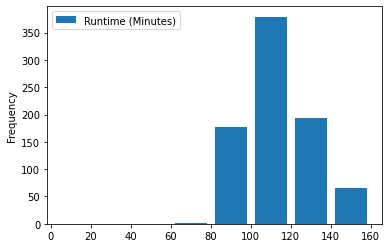

In [13]:
df[['Runtime (Minutes)']].plot(kind='hist', bins=[0,60,80,100,120,140,160], rwidth=0.8)

In this time period, a lot of films' duration were between 60-155 so it could be more comfortable when choosing cinema.

###  Q2. Highest revenue of the films every 2 year. This give us a sense of situation that is changing every 2 years with financial side of the world of cinema.


In [14]:
t=data[data['Year']==2006]
tt=data[data['Year']==2007]

a=data[data['Year']==2008]
aa=data[data['Year']==2009]

s=data[data['Year']==2010]
ss=data[data['Year']==2011] ## Creating dataframes with each year

f=data[data['Year']==2012]
ff=data[data['Year']==2013]

g=data[data['Year']==2014]
gg=data[data['Year']==2015]

ggg=data[data['Year']==2016]


t=t.sort_values(by='Revenue (Millions)', ascending=False) 
t=t.head(1)
tt=tt.sort_values(by='Revenue (Millions)', ascending=False) # finding HIGHEST REVENUE in this particular 2-year period
tt=tt.head(1)
ttt=pd.merge(t,tt, how='outer') # using function merge() to join both dataframes that contain highest revenue of each year.
tttt=ttt.sort_values(by='Revenue (Millions)', ascending=False)

a=a.sort_values(by='Revenue (Millions)', ascending=False)
a=a.head(1)
aa=aa.sort_values(by='Revenue (Millions)', ascending=False) 
aa=aa.head(1)
aaa=pd.merge(a,aa, how='outer')
aaaa=aaa.sort_values(by='Revenue (Millions)', ascending=False)

s=s.sort_values(by='Revenue (Millions)', ascending=False)
s=s.head(1)
ss=ss.sort_values(by='Revenue (Millions)', ascending=False)
ss=ss.head(1)
sss=pd.merge(s,ss, how='outer')
ssss=sss.sort_values(by='Revenue (Millions)', ascending=False)

f=f.sort_values(by='Revenue (Millions)', ascending=False)
f=f.head(1)
ff=ff.sort_values(by='Revenue (Millions)', ascending=False)
ff=ff.head(1)
fff=pd.merge(f,ff, how='outer')
ffff=fff.sort_values(by='Revenue (Millions)', ascending=False)

g=g.sort_values(by='Revenue (Millions)', ascending=False)
g=g.head(1)
gg=gg.sort_values(by='Revenue (Millions)', ascending=False)
gg=gg.head(1)
ggg=ggg.sort_values(by='Revenue (Millions)', ascending=False)
ggg=ggg.head(1) #due to we one year held as single, we just put it to recent years, so it will contain highest revenues of (2014-2016)
gggg=pd.merge(g,gg, how='outer')
ggggg=gggg.sort_values(by='Revenue (Millions)', ascending=False)

m1=pd.merge(aaa,sss,how='outer')
m2=pd.merge(ttt,fff, how='outer')
m3=pd.merge(m1,gggg, how='outer')
m4=pd.merge(m3,m2, how='outer')

rev=m4.sort_values(by='Year', ascending=False) # all highest revenues of each year
rev



Rank                                         Title  \
5    51    Star Wars: Episode VII - The Force Awakens   
4   332                               American Sniper   
9   579               The Hunger Games: Catching Fire   
8    77                                  The Avengers   
3   115  Harry Potter and the Deathly Hallows: Part 2   
2   689                                   Toy Story 3   
1    88                                        Avatar   
0    55                               The Dark Knight   
7   345                                  Spider-Man 3   
6    79    Pirates of the Caribbean: Dead Man's Chest   

                        Genre  \
5    Action,Adventure,Fantasy   
4      Action,Biography,Drama   
9    Action,Adventure,Mystery   
8               Action,Sci-Fi   
3     Adventure,Drama,Fantasy   
2  Animation,Adventure,Comedy   
1    Action,Adventure,Fantasy   
0          Action,Crime,Drama   
7            Action,Adventure   
6    Action,Adventure,Fantasy   

                                         Description           Director  \
5  Three decades after the defeat of the Galactic...        J.J. Abrams   
4  Navy S.E.A.L. sniper Chris Kyle's pinpoint acc...     Clint Eastwood   
9  Katniss Everdeen and Peeta Mellark become targ...   Francis Lawrence   
8  Earth's mightiest heroes must come together an...        Joss Whedon   
3  Harry, Ron and Hermione search for Voldemort's...        David Yates   
2  The toys are mistakenly delivered to a day-car...        Lee Unkrich   
1  A paraplegic marine dispatched to the moon Pan...      James Cameron   
0  When the menace known as the Joker wreaks havo...  Christopher Nolan   
7  A strange black entity from another world bond...          Sam Raimi   
6  Jack Sparrow races to recover the heart of Dav...     Gore Verbinski   

                                              Actors  Year  Runtime (Minutes)  \
5  Daisy Ridley, John Boyega, Oscar Isaac, Domhna...  2015                136   
4  Bradley Cooper, Sienna Miller, Kyle Gallner, C...  2014                133   
9  Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...  2013                146   
8  Robert Downey Jr., Chris Evans, Scarlett Johan...  2012                143   
3  Daniel Radcliffe, Emma Watson, Rupert Grint, M...  2011                130   
2      Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty  2010                103   
1  Sam Worthington, Zoe Saldana, Sigourney Weaver...  2009                162   
0  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008                152   
7  Tobey Maguire, Kirsten Dunst, Topher Grace, Th...  2007                139   
6  Johnny Depp, Orlando Bloom, Keira Knightley, J...  2006                151   

   Rating    Votes  Revenue (Millions)  Metascore  
5     8.1   661608              936.63       81.0  
4     7.3   353305              350.12       72.0  
9     7.6   525646              424.65       76.0  
8     8.1  1045588              623.28       69.0  
3     8.1   590595              380.96       87.0  
2     8.3   586669              414.98       92.0  
1     7.8   935408              760.51       83.0  
0     9.0  1791916              533.32       82.0  
7     6.2   406219              336.53       59.0  
6     7.3   552027              423.03       53.0

<AxesSubplot:xlabel='Year'>

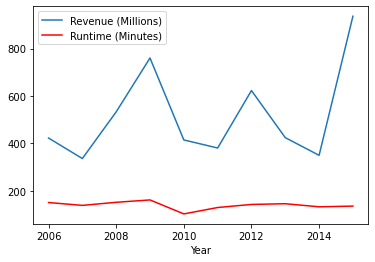

In [15]:
ax=plt.gca() # creating axis with gcd() that means get current axis
rev.plot(kind='line', x='Year', y='Revenue (Millions)', ax=ax)
rev.plot(kind='line', x='Year', y='Runtime (Minutes)', color='red', ax=ax)


We can realize that there is sudden increase of Revenue from 2007 to 2009, 2011 to 2012 and between 2014 and 2016, while in other years discovered decreases in revenue from films.
Runtime has smooth decreases and increases so it's held stable.

In [16]:
tttt.head(1) # 2006-2007





Rank                                       Title                     Genre  \
0    79  Pirates of the Caribbean: Dead Man's Chest  Action,Adventure,Fantasy   

                                         Description        Director  \
0  Jack Sparrow races to recover the heart of Dav...  Gore Verbinski   

                                              Actors  Year  Runtime (Minutes)  \
0  Johnny Depp, Orlando Bloom, Keira Knightley, J...  2006                151   

   Rating   Votes  Revenue (Millions)  Metascore  
0     7.3  552027              423.03       53.0

In [17]:
aaaa.head(1) # 2008-2009

Rank   Title                     Genre  \
1    88  Avatar  Action,Adventure,Fantasy   

                                         Description       Director  \
1  A paraplegic marine dispatched to the moon Pan...  James Cameron   

                                              Actors  Year  Runtime (Minutes)  \
1  Sam Worthington, Zoe Saldana, Sigourney Weaver...  2009                162   

   Rating   Votes  Revenue (Millions)  Metascore  
1     7.8  935408              760.51       83.0

In [18]:
ssss.head(1) # 2010-2011

Rank        Title                       Genre  \
0   689  Toy Story 3  Animation,Adventure,Comedy   

                                         Description     Director  \
0  The toys are mistakenly delivered to a day-car...  Lee Unkrich   

                                          Actors  Year  Runtime (Minutes)  \
0  Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty  2010                103   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.3  586669              414.98       92.0

In [19]:
ffff.head(1) # 2012-2013

Rank         Title          Genre  \
0    77  The Avengers  Action,Sci-Fi   

                                         Description     Director  \
0  Earth's mightiest heroes must come together an...  Joss Whedon   

                                              Actors  Year  Runtime (Minutes)  \
0  Robert Downey Jr., Chris Evans, Scarlett Johan...  2012                143   

   Rating    Votes  Revenue (Millions)  Metascore  
0     8.1  1045588              623.28       69.0

In [20]:
gggg.head(1) # 2014-2016

Rank            Title                   Genre  \
0   332  American Sniper  Action,Biography,Drama   

                                         Description        Director  \
0  Navy S.E.A.L. sniper Chris Kyle's pinpoint acc...  Clint Eastwood   

                                              Actors  Year  Runtime (Minutes)  \
0  Bradley Cooper, Sienna Miller, Kyle Gallner, C...  2014                133   

   Rating   Votes  Revenue (Millions)  Metascore  
0     7.3  353305              350.12       72.0

### Q3. Most popular films and their revenue. Choosing film is not easy as it could be seen, so we will try to find most popular films that can be your choice to today's evening.


In [21]:
pop=data.groupby(['Votes', 'Revenue (Millions)'])['Title'].sum()
pop #as we can see from the bottom that the film The Dark Knight was most popular film between 2006-2016 years/

Votes    Revenue (Millions)
178      0.32                           Bonjour Anne
277      20.76                  2307: Winter's Dream
279      4.21                              Lowriders
291      0.01                              Wakefield
391      0.11                                  Chuck
                                       ...          
1045588  623.28                         The Avengers
1047747  187.99                         Interstellar
1222645  448.13                The Dark Knight Rises
1583625  292.57                            Inception
1791916  533.32                      The Dark Knight
Name: Title, Length: 838, dtype: object

In [22]:
data[data['Title']=='The Dark Knight'] 

Rank            Title               Genre  \
54    55  The Dark Knight  Action,Crime,Drama   

                                          Description           Director  \
54  When the menace known as the Joker wreaks havo...  Christopher Nolan   

                                               Actors  Year  \
54  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008   

    Runtime (Minutes)  Rating    Votes  Revenue (Millions)  Metascore  
54                152     9.0  1791916              533.32       82.0

In [23]:
pop=pd.DataFrame(pop)
pop=pop.sort_values(by='Votes', ascending=False)
pop=pop.head(30) 



We found most popular films and that's cool. These three films will be great selection to see in your freetime.

But, what happens if your friend wants to find film that in specific period(for example between 2007-2013), that has good well reputation among viewers(about 7-8) and most successfull (highest revenue)?
And there is method:

In [24]:
q3=df[((df['Year'] >= 2007) & (df['Year'] <= 2013))
      & (df['Rating'] >7.5)
      & (df['Revenue (Millions)'] > df['Revenue (Millions)'].quantile(0.95))].sort_values(by='Rating', ascending=False)
q3

Rank                                         Title  \
54     55                               The Dark Knight   
124   125                         The Dark Knight Rises   
688   689                                   Toy Story 3   
76     77                                  The Avengers   
114   115  Harry Potter and the Deathly Hallows: Part 2   
203   204                                      Iron Man   
271   272             The Hobbit: An Unexpected Journey   
87     88                                        Avatar   
270   271                                       Skyfall   
578   579               The Hunger Games: Catching Fire   

                          Genre  \
54           Action,Crime,Drama   
124             Action,Thriller   
688  Animation,Adventure,Comedy   
76                Action,Sci-Fi   
114     Adventure,Drama,Fantasy   
203     Action,Adventure,Sci-Fi   
271           Adventure,Fantasy   
87     Action,Adventure,Fantasy   
270   Action,Adventure,Thriller   
578    Action,Adventure,Mystery   

                                           Description           Director  \
54   When the menace known as the Joker wreaks havo...  Christopher Nolan   
124  Eight years after the Joker's reign of anarchy...  Christopher Nolan   
688  The toys are mistakenly delivered to a day-car...        Lee Unkrich   
76   Earth's mightiest heroes must come together an...        Joss Whedon   
114  Harry, Ron and Hermione search for Voldemort's...        David Yates   
203  After being held captive in an Afghan cave, bi...        Jon Favreau   
271  A reluctant hobbit, Bilbo Baggins, sets out to...      Peter Jackson   
87   A paraplegic marine dispatched to the moon Pan...      James Cameron   
270  Bond's loyalty to M is tested when her past co...         Sam Mendes   
578  Katniss Everdeen and Peeta Mellark become targ...   Francis Lawrence   

                                                Actors  Year  \
54   [Christian Bale,  Heath Ledger,  Aaron Eckhart...  2008   
124  [Christian Bale,  Tom Hardy,  Anne Hathaway, G...  2012   
688  [Tom Hanks,  Tim Allen,  Joan Cusack,  Ned Bea...  2010   
76   [Robert Downey Jr.,  Chris Evans,  Scarlett Jo...  2012   
114  [Daniel Radcliffe,  Emma Watson,  Rupert Grint...  2011   
203  [Robert Downey Jr.,  Gwyneth Paltrow,  Terrenc...  2008   
271  [Martin Freeman,  Ian McKellen,  Richard Armit...  2012   
87   [Sam Worthington,  Zoe Saldana,  Sigourney Wea...  2009   
270  [Daniel Craig,  Javier Bardem,  Naomie Harris,...  2012   
578  [Jennifer Lawrence,  Josh Hutcherson,  Liam He...  2013   

     Runtime (Minutes)  Rating    Votes  Revenue (Millions)  Metascore  
54                 152     9.0  1791916              533.32       82.0  
124                164     8.5  1222645              448.13       78.0  
688                103     8.3   586669              414.98       92.0  
76                 143     8.1  1045588              623.28       69.0  
114                130     8.1   590595              380.96       87.0  
203                126     7.9   737719              318.30       79.0  
271                169     7.9   668651              303.00       58.0  
87                 162     7.8   935408              760.51       83.0  
270                143     7.8   547386              304.36       81.0  
578                146     7.6   525646              424.65       76.0

Here we have a list of films that could suit to your friend)
Some of you could see that 'The Dark Knight' and 'The Dark Knight' are appeared in both dataframes. That means they're really first choice to your friend, because there small amount of  better films in terms of rating and votes.

<AxesSubplot:xlabel='Year'>

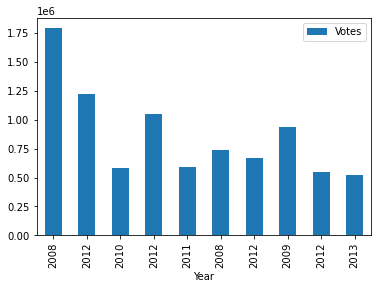

In [25]:
q3.plot(kind='bar', x='Year', y='Votes')

There clearly fact that older films are most popular and lovely, because of their atmosphere and nostalgy when you play it another time.

### Q4. Which 3 directors have most directed films with revenue at least 70millions. It will show which directors are most successfull while directing movies and their professional skills and experience.



In [26]:
directors=data[['Director']]
directors=directors.value_counts()
directors=pd.DataFrame(directors)
directors

0
Director             
Ridley Scott        8
David Yates         6
Michael Bay         6
Paul W.S. Anderson  6
Christopher Nolan   5
...                ..
Levan Gabriadze     1
Luca Guadagnino     1
Luke Greenfield     1
Luke Scott          1
Aamir Khan          1

[524 rows x 1 columns]

Table demonstrates us that Ridley Scott takes top position in frequently directing of films.

Let's remove directors that has fewer than 3 films


In [27]:
directors=directors[directors[0]>3]
directors

0
Director             
Ridley Scott        8
David Yates         6
Michael Bay         6
Paul W.S. Anderson  6
Christopher Nolan   5
Denis Villeneuve    5
Martin Scorsese     5
Justin Lin          5
Zack Snyder         5
David Fincher       5
Danny Boyle         5
M. Night Shyamalan  5
Peter Berg          5
Antoine Fuqua       5
Woody Allen         5
J.J. Abrams         5
Nicholas Stoller    4
Louis Leterrier     4
Paul Feig           4
Peter Jackson       4
Matthew Vaughn      4
David O. Russell    4
Ron Howard          4
Tim Burton          4
Dennis Dugan        4
Steven Spielberg    4
Ben Affleck         4
Francis Lawrence    4
Adam McKay          4
Lars von Trier      4
Guillermo del Toro  4
Guy Ritchie         4
James Wan           4
Jon Favreau         4

In [28]:
 directors.shape # There are 34 directors

(34, 1)

In [29]:
column_names = ["Rank", "Title", "Genre","Description", "Director", "Actors", "Year", "Runtime (Minutes)", "Rating","Votes", "Revenue (Millions)", "Metascore"]

dir_df = pd.DataFrame(columns = column_names) # creating empty database so we can append directors with more 3 films and revenue more 70millions
dir_df

directors.head(3)

0
Director       
Ridley Scott  8
David Yates   6
Michael Bay   6

In [30]:
dir_df = dir_df.append(data[data['Director']=='Ridley Scott'])
dir_df = dir_df.append(data[data['Director']=='David Yates'])
dir_df = dir_df.append(data[data['Director']=='Michael Bay'])


dir_df

Rank                                         Title  \
1      2                                    Prometheus   
102  103                                   The Martian   
387  388                                    Robin Hood   
470  471                             American Gangster   
516  517                        Exodus: Gods and Kings   
521  522                                 The Counselor   
530  531                                   A Good Year   
737  738                                  Body of Lies   
10    11       Fantastic Beasts and Where to Find Them   
107  108                          The Legend of Tarzan   
114  115  Harry Potter and the Deathly Hallows: Part 2   
314  315     Harry Potter and the Order of the Phoenix   
418  419  Harry Potter and the Deathly Hallows: Part 1   
473  474        Harry Potter and the Half-Blood Prince   
126  127               Transformers: Age of Extinction   
168  169                                      13 Hours   
212  213                                  Transformers   
566  567                Transformers: Dark of the Moon   
668  669                                   Pain & Gain   
710  711           Transformers: Revenge of the Fallen   

                        Genre  \
1    Adventure,Mystery,Sci-Fi   
102    Adventure,Drama,Sci-Fi   
387    Action,Adventure,Drama   
470     Biography,Crime,Drama   
516    Action,Adventure,Drama   
521      Crime,Drama,Thriller   
530      Comedy,Drama,Romance   
737      Action,Drama,Romance   
10   Adventure,Family,Fantasy   
107    Action,Adventure,Drama   
114   Adventure,Drama,Fantasy   
314  Adventure,Family,Fantasy   
418  Adventure,Family,Fantasy   
473  Adventure,Family,Fantasy   
126   Action,Adventure,Sci-Fi   
168      Action,Drama,History   
212   Action,Adventure,Sci-Fi   
566   Action,Adventure,Sci-Fi   
668        Comedy,Crime,Drama   
710   Action,Adventure,Sci-Fi   

                                           Description      Director  \
1    Following clues to the origin of mankind, a te...  Ridley Scott   
102  An astronaut becomes stranded on Mars after hi...  Ridley Scott   
387  In 12th century England, Robin and his band of...  Ridley Scott   
470  In 1970s America, a detective works to bring d...  Ridley Scott   
516  The defiant leader Moses rises up against the ...  Ridley Scott   
521  A lawyer finds himself in over his head when h...  Ridley Scott   
530  A British investment broker inherits his uncle...  Ridley Scott   
737  A CIA agent on the ground in Jordan hunts down...  Ridley Scott   
10   The adventures of writer Newt Scamander in New...   David Yates   
107  Tarzan, having acclimated to life in London, i...   David Yates   
114  Harry, Ron and Hermione search for Voldemort's...   David Yates   
314  With their warning about Lord Voldemort's retu...   David Yates   
418  As Harry races against time and evil to destro...   David Yates   
473  As Harry Potter begins his sixth year at Hogwa...   David Yates   
126  Autobots must escape sight from a bounty hunte...   Michael Bay   
168  During an attack on a U.S. compound in Libya, ...   Michael Bay   
212  An ancient struggle between two Cybertronian r...   Michael Bay   
566  The Autobots learn of a Cybertronian spacecraf...   Michael Bay   
668  A trio of bodybuilders in Florida get caught u...   Michael Bay   
710  Sam Witwicky leaves the Autobots behind for a ...   Michael Bay   

                                                Actors  Year  \
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
102  Matt Damon, Jessica Chastain, Kristen Wiig, Ka...  2015   
387  Russell Crowe, Cate Blanchett, Matthew Macfady...  2010   
470  Denzel Washington, Russell Crowe, Chiwetel Eji...  2007   
516  Christian Bale, Joel Edgerton, Ben Kingsley, S...  2014   
521  Michael Fassbender, Penélope Cruz, Cameron Dia...  2013   
530  Russell Crowe, Abbie Cornish, Albert Finney, M...  2006   
737  Leonardo DiCaprio, Russell Crowe, Mark Strong,...  2008   
10

+ DataFrame that include all films directed by this 3 people

In [31]:
dir_df=dir_df[dir_df['Revenue (Millions)']>70]
dir_df

Rank                                         Title  \
1      2                                    Prometheus   
102  103                                   The Martian   
387  388                                    Robin Hood   
470  471                             American Gangster   
10    11       Fantastic Beasts and Where to Find Them   
107  108                          The Legend of Tarzan   
114  115  Harry Potter and the Deathly Hallows: Part 2   
314  315     Harry Potter and the Order of the Phoenix   
418  419  Harry Potter and the Deathly Hallows: Part 1   
473  474        Harry Potter and the Half-Blood Prince   
126  127               Transformers: Age of Extinction   
212  213                                  Transformers   
566  567                Transformers: Dark of the Moon   
710  711           Transformers: Revenge of the Fallen   

                        Genre  \
1    Adventure,Mystery,Sci-Fi   
102    Adventure,Drama,Sci-Fi   
387    Action,Adventure,Drama   
470     Biography,Crime,Drama   
10   Adventure,Family,Fantasy   
107    Action,Adventure,Drama   
114   Adventure,Drama,Fantasy   
314  Adventure,Family,Fantasy   
418  Adventure,Family,Fantasy   
473  Adventure,Family,Fantasy   
126   Action,Adventure,Sci-Fi   
212   Action,Adventure,Sci-Fi   
566   Action,Adventure,Sci-Fi   
710   Action,Adventure,Sci-Fi   

                                           Description      Director  \
1    Following clues to the origin of mankind, a te...  Ridley Scott   
102  An astronaut becomes stranded on Mars after hi...  Ridley Scott   
387  In 12th century England, Robin and his band of...  Ridley Scott   
470  In 1970s America, a detective works to bring d...  Ridley Scott   
10   The adventures of writer Newt Scamander in New...   David Yates   
107  Tarzan, having acclimated to life in London, i...   David Yates   
114  Harry, Ron and Hermione search for Voldemort's...   David Yates   
314  With their warning about Lord Voldemort's retu...   David Yates   
418  As Harry races against time and evil to destro...   David Yates   
473  As Harry Potter begins his sixth year at Hogwa...   David Yates   
126  Autobots must escape sight from a bounty hunte...   Michael Bay   
212  An ancient struggle between two Cybertronian r...   Michael Bay   
566  The Autobots learn of a Cybertronian spacecraf...   Michael Bay   
710  Sam Witwicky leaves the Autobots behind for a ...   Michael Bay   

                                                Actors  Year  \
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
102  Matt Damon, Jessica Chastain, Kristen Wiig, Ka...  2015   
387  Russell Crowe, Cate Blanchett, Matthew Macfady...  2010   
470  Denzel Washington, Russell Crowe, Chiwetel Eji...  2007   
10   Eddie Redmayne, Katherine Waterston, Alison Su...  2016   
107  Alexander Skarsgård, Rory J. Saper, Christian ...  2016   
114  Daniel Radcliffe, Emma Watson, Rupert Grint, M...  2011   
314  Daniel Radcliffe, Emma Watson, Rupert Grint, B...  2007   
418  Daniel Radcliffe, Emma Watson, Rupert Grint, B...  2010   
473  Daniel Radcliffe, Emma Watson, Rupert Grint, M...  2009   
126  Mark Wahlberg, Nicola Peltz, Jack Reynor, Stan...  2014   
212  Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...  2007   
566  Shia LaBeouf, Rosie Huntington-Whiteley, Tyres...  2011   
710  Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...  2009   

    Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
1                 124     7.0  485820              126.46       65.0  
102               144     8.0  556097              228.43       80.0  
387               140     6.7  221117              105.22       53.0  
470               157     7.8  337835              130.13       76.0  
10                133     7.5  232072              234.02       66.0  
107               110     6.3  117590              126.59       44.0  
114               130     8.1  590595              380.96       87.0  
314               138     7

<AxesSubplot:xlabel='Director', ylabel='Rating'>

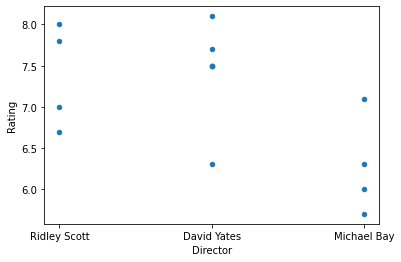

In [32]:
dir_df.plot(kind='scatter', x='Director', y='Rating')
# plot demonstrates ratings of each director, we can see that David Yates has most popular film while Michael Bay has least popular

### Q5. Find how many revenue earned by the genre. It is obvious that somee people loves romantic, drama when other side will prefer actions, guns, thriller and so on. Therefore, cash from each genre is various, and we try to find which films with specific genres have more revenues.

In [33]:
g = df.groupby('Genre')['Revenue (Millions)'].sum().reset_index()
fig = px.pie(g, names='Genre', values='Revenue (Millions)').update_traces(textposition='inside', textinfo='value + percent',)                                                                     
fig.show()

The pie chart above divided by a lot of genre combinations such Action,Crime,Romance and so on.

It is really amazing to see so many genres and how many percentage of people are decided to select particular genre when searching the Internet or going to cinema with friends.

As I supposed from the start, first places will take genre 'adventure' because recent years this genre was really popularised. With this coding process I have verified this and really happy that I did analyse. 

In [34]:
data

Rank                     Title                     Genre  \
0       1   Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2                Prometheus  Adventure,Mystery,Sci-Fi   
2       3                     Split           Horror,Thriller   
3       4                      Sing   Animation,Comedy,Family   
4       5             Suicide Squad  Action,Adventure,Fantasy   
..    ...                       ...                       ...   
993   994  Resident Evil: Afterlife   Action,Adventure,Horror   
994   995                 Project X                    Comedy   
996   997           Hostel: Part II                    Horror   
997   998    Step Up 2: The Streets       Drama,Music,Romance   
999  1000                Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
993  While still out to destroy the evil Umbrella C...    Paul W.S. Anderson   
994  3 high school seniors throw a birthday party t...       Nima Nourizadeh   
996  Three American college students studying abroa...              Eli Roth   
997  Romantic sparks occur between two dance studen...            Jon M. Chu   
999  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016   
..                                                 ...   ...   
993  Milla Jovovich, Ali Larter, Wentworth Miller,K...  2010   
994  Thomas Mann, Oliver Cooper, Jonathan Daniel Br...  2012   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0                  121     8.1  757074              333.13       76.0  
1                  124     7.0  485820              126.46       65.0  
2                  117     7.3  157606              138.12       62.0  
3                  108     7.2   60545              270.32       59.0  
4                  123     6.2  393727              325.02       40.0  
..                 ...     ...     ...                 ...        ...  
993                 97     5.9  140900               60.13       37.0  
994                 88     6.7  164088               54.72       48.0  
996                 94     5.5   73152               17.54       46.0  
997                 98     6.2   70699               58.01       50.0  
999                 87     5.3   12435               19.64       11.0  

[838 rows x 12 columns]

# Conclusion

+ After analyzing I am really interested to see some of the films that has optimal range of votes and rating. I knew a lot of films that I didn't know earlier and that's motivating me to choose from the dataset analysis that I did here.

+ As I said before I am really happy to make project like this to practice more, and it was really helpful because sometime I did wrong statements, and searched how to fix problems related to the codes or something else.

+ After that I will not stop practicing because it is really interesting and will help in future works.

### <font color='green'> Hope that you also discovered something new from my final project, so thank you for reading this all of my work. I appreciate that, bye, have nice day)
